# #01 - Exploring MoveDataFrame


To work with Pymove you need to import the data into our data structure: **MoveDataFrame**!

**MoveDataFrame** is an abstraction that instantiates a new data structure that manipulates the structure the user wants. This is done using the Factory Method design pattern. This structure allows the interface to be implemented using different representations and libraries that manipulate the data.

We have an interface that delimits the scope that new implementing classes should have. We currently have two concrete classes that implement this interface: **PandasMoveDataFrame** and **DaskMoveDataFrame** (under construction), which use Pandas and Dask respectively for data manipulation.


It works like this: The user instantiating a MoveDataFrame provides a flag telling which library they want to use for manipulating this data.

Now that we understand the concept and data structure of PyMove, **hands on!**

---

### MoveDataFrame

A MoveDataFrame must contain the columns:
- `lat`: represents the latitude of the point.
- `lon`: represents the longitude of the point.
- `datetime`: represents the date and time of the point.

In addition, the user can enter several other columns as trajectory id. **If the id is not entered, the points are supposed to belong to the same path**.

---

### Creating a MoveDataFrame

A MoveDataFrame can be created by passing a Pandas DataFrame, a list, dict or even reading a file. Look:

In [1]:
import pymove
from pymove import MoveDataFrame

#### From a list

In [2]:
list_data = [[39.984094, 116.319236, '2008-10-23 05:53:05', 1],
             [39.984198, 116.319322, '2008-10-23 05:53:06', 1],
             [39.984224, 116.319402, '2008-10-23 05:53:11', 1], 
             [39.984224, 116.319402, '2008-10-23 05:53:11', 1], 
             [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
             [39.984224, 116.319402, '2008-10-23 05:53:11', 1]]
move_df = MoveDataFrame(data=list_data, latitude="lat", longitude="lon", datetime="datetime", traj_id="id")
move_df.head()

,lat,lon,datetime,id
0,39.984093,116.319237,2008-10-23 05:53:05,1
1,39.984200,116.319321,2008-10-23 05:53:06,1
2,39.984222,116.319405,2008-10-23 05:53:11,1
3,39.984222,116.319405,2008-10-23 05:53:11,1
4,39.984222,116.319405,2008-10-23 05:53:11,1


#### From a dict

In [3]:
dict_data = {
    'lat': [39.984198, 39.984224, 39.984094],
    'lon': [116.319402, 116.319322, 116.319402],
    'datetime': ['2008-10-23 05:53:11', '2008-10-23 05:53:06', '2008-10-23 05:53:06']
}

move_df = MoveDataFrame(data=dict_data, latitude="lat", longitude="lon", datetime="datetime", traj_id="id")
move_df.head()

,lat,lon,datetime
0,39.984200,116.319405,2008-10-23 05:53:11
1,39.984222,116.319321,2008-10-23 05:53:06
2,39.984093,116.319405,2008-10-23 05:53:06


#### From a DataFrame Pandas

In [4]:
import pandas as pd

df = pd.read_csv('geolife_sample.csv', parse_dates=['datetime'])
move_df = MoveDataFrame(data=df, latitude="lat", longitude="lon", datetime="datetime")

move_df.head()

,lat,lon,datetime,id
0,39.984093,116.319237,2008-10-23 05:53:05,1
1,39.984200,116.319321,2008-10-23 05:53:06,1
2,39.984222,116.319405,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984219,116.319420,2008-10-23 05:53:21,1


#### From a file 

In [5]:
move_df = pymove.read_csv('geolife_sample.csv')
move_df.head()

,lat,lon,datetime,id
0,39.984093,116.319237,2008-10-23 05:53:05,1
1,39.984200,116.319321,2008-10-23 05:53:06,1
2,39.984222,116.319405,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984219,116.319420,2008-10-23 05:53:21,1


Cool, huh? The default flag is Pandas. Look that:

In [6]:
type(move_df)

pymove.core.dataframe.PandasMoveDataFrame

Let's try creating one with Dask!

In [7]:
move_df = pymove.read_csv('geolife_sample.csv', type_='dask')
move_df.head()

,lat,lon,datetime,id
0,39.984093,116.319237,2008-10-23 05:53:05,1
1,39.984200,116.319321,2008-10-23 05:53:06,1
2,39.984222,116.319405,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984219,116.319420,2008-10-23 05:53:21,1


In [8]:
type(move_df)

pymove.core.dataframe.DaskMoveDataFrame

---

### What's in MoveDataFrame?

The MoveDataFrame stores the following information:

In [9]:
move_df = pymove.read_csv('geolife_sample.csv')

#### 1. The kind of data he was instantiated

In [10]:
move_df.get_type()

'pandas'

In [11]:
move_df.columns

Index(['lat', 'lon', 'datetime', 'id'], dtype='object')

In [12]:
move_df.dtypes

lat                float32
lon                float32
datetime    datetime64[ns]
id                   int64
dtype: object

#### 2. Informações das ultimas operações realizadas: o nome, a memória utilizada e o tempo de duração do processamento

In [13]:
move_df.last_operation

{'name': 'dtypes', 'time in seconds': 0.0003554821014404297, 'memory': '0 B'}

In addition to these attributes, we have some functions that allow us to:

#### 1. View trajectory information

In [14]:
move_df.show_trajectories_info()


======================= INFORMATION ABOUT DATASET =======================

Number of Points: 217653

Number of IDs objects: 2

Start Date:2008-10-23 05:53:05     End Date:2009-03-19 05:46:37

Bounding Box:(22.147577, 113.54884, 41.13206, 121.15623)





#### 2. View the number of users

In [15]:
move_df.get_users_number()

1

#### 3. Transform our data to

#### a. Numpy

In [16]:
move_df.to_numpy()

array([[39.984092712402344, 116.3192367553711,
        Timestamp('2008-10-23 05:53:05'), 1],
       [39.98419952392578, 116.31932067871094,
        Timestamp('2008-10-23 05:53:06'), 1],
       [39.984222412109375, 116.31940460205078,
        Timestamp('2008-10-23 05:53:11'), 1],
       ...,
       [39.99994659423828, 116.327392578125,
        Timestamp('2009-03-19 05:46:12'), 5],
       [40.00001525878906, 116.32743072509766,
        Timestamp('2009-03-19 05:46:17'), 5],
       [39.999977111816406, 116.32746124267578,
        Timestamp('2009-03-19 05:46:37'), 5]], dtype=object)

#### b. Dicts

In [17]:
move_df.to_dict();
move_df.last_operation

{'name': 'to_dict',
 'time in seconds': 0.8098456859588623,
 'memory': '116.98828125 MB'}

#### c. Files .csv

In [18]:
move_df.to_csv('move_data.csv')

#### 4. And even switch from a Pandas to Dask and back again!

In [19]:
new_move = move_df.convert_to('dask')
print(type(new_move))
move_df = new_move.convert_to('pandas')
print(type(move_df))

<class 'pymove.core.dataframe.DaskMoveDataFrame'>
<class 'pymove.core.dataframe.PandasMoveDataFrame'>


#### 5. You can also write files with

In [20]:
move_df.write_file('move_df_write_file.txt')

#### or

In [21]:
move_df.to_csv('move_data.csv')

#### 6. Create a virtual grid 

In [22]:
move_df.to_grid(8)


Creating a virtual grid without polygons
...cell size by degree: 7.218478943256657e-05
...grid_size_lat_y:262999
grid_size_lon_x:105388

..A virtual grid was created


#### 7. Get data bound box

In [23]:
move_df.get_bbox()

(22.147577, 113.54884, 41.13206, 121.15623)

#### 8. Create new columns:

#### a. `tid`: trajectory id based on Id and datetime

In [24]:
move_df.generate_tid_based_on_id_datatime()
move_df.head()


Creating or updating tid feature...

...Sorting by id and datetime to increase performance


...tid feature was created...



,lat,lon,datetime,id,tid
0,39.984093,116.319237,2008-10-23 05:53:05,1,12008102305
1,39.984200,116.319321,2008-10-23 05:53:06,1,12008102305
2,39.984222,116.319405,2008-10-23 05:53:11,1,12008102305
3,39.984211,116.319389,2008-10-23 05:53:16,1,12008102305
4,39.984219,116.319420,2008-10-23 05:53:21,1,12008102305


#### b. `date`: extract date on datetime

In [25]:
move_df.generate_date_features()
move_df.head()

Creating date features...
..Date features was created...



,lat,lon,datetime,id,tid,date
0,39.984093,116.319237,2008-10-23 05:53:05,1,12008102305,2008-10-23
1,39.984200,116.319321,2008-10-23 05:53:06,1,12008102305,2008-10-23
2,39.984222,116.319405,2008-10-23 05:53:11,1,12008102305,2008-10-23
3,39.984211,116.319389,2008-10-23 05:53:16,1,12008102305,2008-10-23
4,39.984219,116.319420,2008-10-23 05:53:21,1,12008102305,2008-10-23


#### c. `hour`: extract hour on datetime

In [26]:
move_df.generate_hour_features()
move_df.head()


Creating or updating a feature for hour...

...Hour feature was created...



,lat,lon,datetime,id,tid,date,hour
0,39.984093,116.319237,2008-10-23 05:53:05,1,12008102305,2008-10-23,5
1,39.984200,116.319321,2008-10-23 05:53:06,1,12008102305,2008-10-23,5
2,39.984222,116.319405,2008-10-23 05:53:11,1,12008102305,2008-10-23,5
3,39.984211,116.319389,2008-10-23 05:53:16,1,12008102305,2008-10-23,5
4,39.984219,116.319420,2008-10-23 05:53:21,1,12008102305,2008-10-23,5


#### d. `day`: day of the week from datatime.

In [27]:
move_df.generate_day_of_the_week_features()
move_df.head()


Creating or updating day of the week feature...

...the day of the week feature was created...



,lat,lon,datetime,id,tid,date,hour,day
0,39.984093,116.319237,2008-10-23 05:53:05,1,12008102305,2008-10-23,5,Thursday
1,39.984200,116.319321,2008-10-23 05:53:06,1,12008102305,2008-10-23,5,Thursday
2,39.984222,116.319405,2008-10-23 05:53:11,1,12008102305,2008-10-23,5,Thursday
3,39.984211,116.319389,2008-10-23 05:53:16,1,12008102305,2008-10-23,5,Thursday
4,39.984219,116.319420,2008-10-23 05:53:21,1,12008102305,2008-10-23,5,Thursday


#### e. `period`: time of day or period from datatime.

In [28]:
move_df.generate_time_of_day_features()
move_df.head()


Creating or updating period feature
...Early morning from 0H to 6H
...Morning from 6H to 12H
...Afternoon from 12H to 18H
...Evening from 18H to 24H

...the period of day feature was created


,lat,lon,datetime,id,tid,date,hour,day,period
0,39.984093,116.319237,2008-10-23 05:53:05,1,12008102305,2008-10-23,5,Thursday,Early morning
1,39.984200,116.319321,2008-10-23 05:53:06,1,12008102305,2008-10-23,5,Thursday,Early morning
2,39.984222,116.319405,2008-10-23 05:53:11,1,12008102305,2008-10-23,5,Thursday,Early morning
3,39.984211,116.319389,2008-10-23 05:53:16,1,12008102305,2008-10-23,5,Thursday,Early morning
4,39.984219,116.319420,2008-10-23 05:53:21,1,12008102305,2008-10-23,5,Thursday,Early morning


#### f. `dist_to_prev`, `dist_to_next`, `dist_prev_to_next` : three distance in meters to an GPS point P (lat, lon).

In [29]:
move_df.generate_dist_features()
move_df.head()


Creating or updating distance features in meters...

...Sorting by id and datetime to increase performance

...Set id as index to increase attribution performance



...Reset index

..Total Time: 0.29607629776000977


,id,lat,lon,datetime,tid,date,hour,day,period,dist_to_prev,dist_to_next,dist_prev_to_next
0,1,39.984093,116.319237,2008-10-23 05:53:05,12008102305,2008-10-23,5,Thursday,Early morning,NaN,14.015319,NaN
1,1,39.984200,116.319321,2008-10-23 05:53:06,12008102305,2008-10-23,5,Thursday,Early morning,14.015319,7.345484,20.082062
2,1,39.984222,116.319405,2008-10-23 05:53:11,12008102305,2008-10-23,5,Thursday,Early morning,7.345484,1.628622,5.929780
3,1,39.984211,116.319389,2008-10-23 05:53:16,12008102305,2008-10-23,5,Thursday,Early morning,1.628622,2.448495,1.224247
4,1,39.984219,116.319420,2008-10-23 05:53:21,12008102305,2008-10-23,5,Thursday,Early morning,2.448495,66.161008,68.115491


#### f. `time_to_prev`, `speed_to_prev`:  create three distance to an GPS point P (lat, lon).  After, create two feature to time between two P: time to previous and time to next.

In [30]:
move_df.generate_dist_time_speed_features()
move_df.head()


Creating or updating distance, time and speed features in meters by seconds

...Sorting by id and datetime to increase performance

...Set id as index to a higher peformance



...Reset index...

..Total Time: 0.249


,id,lat,lon,datetime,tid,date,hour,day,period,dist_to_prev,dist_to_next,dist_prev_to_next,time_to_prev,speed_to_prev
0,1,39.984093,116.319237,2008-10-23 05:53:05,12008102305,2008-10-23,5,Thursday,Early morning,NaN,14.015319,NaN,NaN,NaN
1,1,39.984200,116.319321,2008-10-23 05:53:06,12008102305,2008-10-23,5,Thursday,Early morning,14.015319,7.345484,20.082062,1.0,14.015319
2,1,39.984222,116.319405,2008-10-23 05:53:11,12008102305,2008-10-23,5,Thursday,Early morning,7.345484,1.628622,5.929780,5.0,1.469097
3,1,39.984211,116.319389,2008-10-23 05:53:16,12008102305,2008-10-23,5,Thursday,Early morning,1.628622,2.448495,1.224247,5.0,0.325724
4,1,39.984219,116.319420,2008-10-23 05:53:21,12008102305,2008-10-23,5,Thursday,Early morning,2.448495,66.161008,68.115491,5.0,0.489699


#### g. `situation`:   column with move and stop points by radius.

In [31]:
move_df.generate_move_and_stop_by_radius()
move_df.head()


Creating or updating features MOVE and STOPS...


....There are 26229 stops to this parameters



,id,lat,lon,datetime,tid,date,hour,day,period,dist_to_prev,dist_to_next,dist_prev_to_next,time_to_prev,speed_to_prev,situation
0,1,39.984093,116.319237,2008-10-23 05:53:05,12008102305,2008-10-23,5,Thursday,Early morning,NaN,14.015319,NaN,NaN,NaN,nan
1,1,39.984200,116.319321,2008-10-23 05:53:06,12008102305,2008-10-23,5,Thursday,Early morning,14.015319,7.345484,20.082062,1.0,14.015319,move
2,1,39.984222,116.319405,2008-10-23 05:53:11,12008102305,2008-10-23,5,Thursday,Early morning,7.345484,1.628622,5.929780,5.0,1.469097,move
3,1,39.984211,116.319389,2008-10-23 05:53:16,12008102305,2008-10-23,5,Thursday,Early morning,1.628622,2.448495,1.224247,5.0,0.325724,move
4,1,39.984219,116.319420,2008-10-23 05:53:21,12008102305,2008-10-23,5,Thursday,Early morning,2.448495,66.161008,68.115491,5.0,0.489699,move


#### 9. Get time difference between max and min datetime in trajectory data.

In [32]:
move_df.time_interval()

Timedelta('146 days 23:53:32')

#### 10. Create views

#### a. Plot all features data

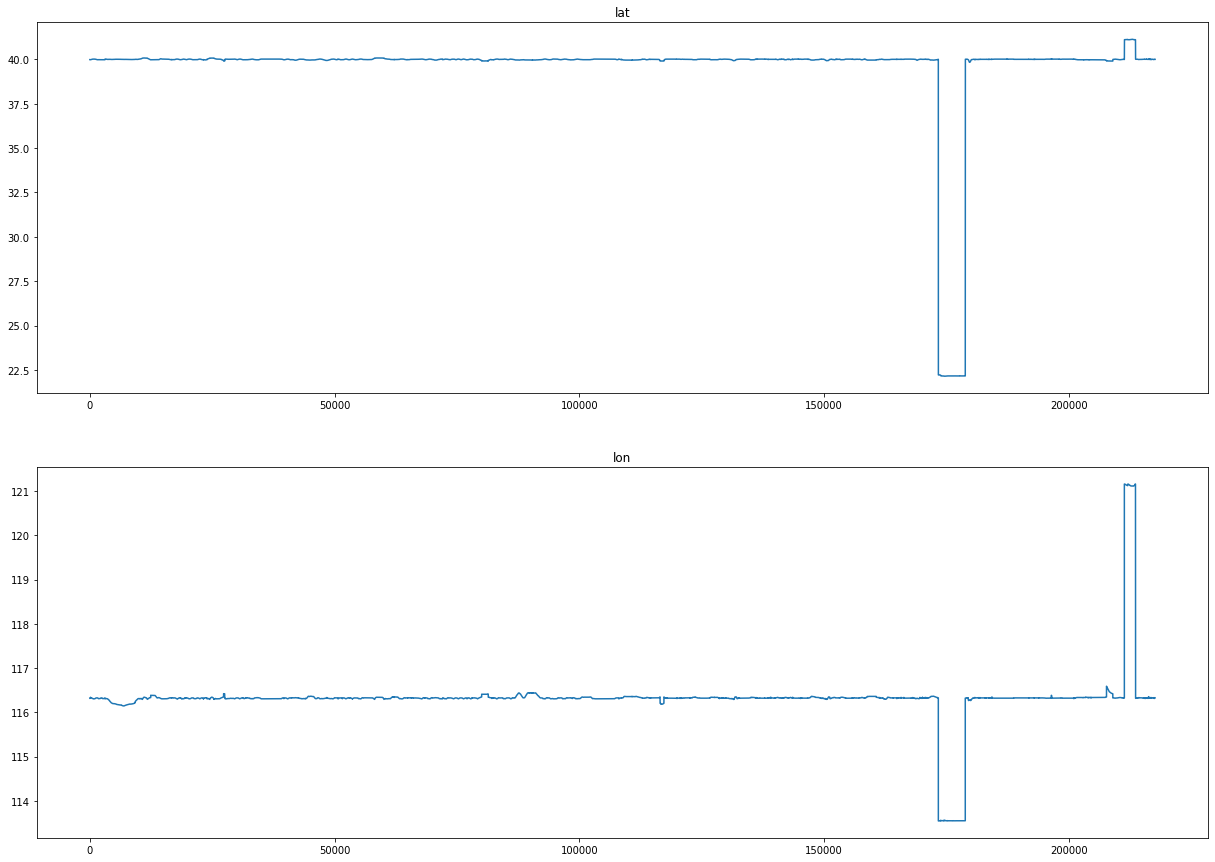

In [33]:
move_df.plot_all_features(return_fig=False)

#### b. Plot all trajs with scatter plot

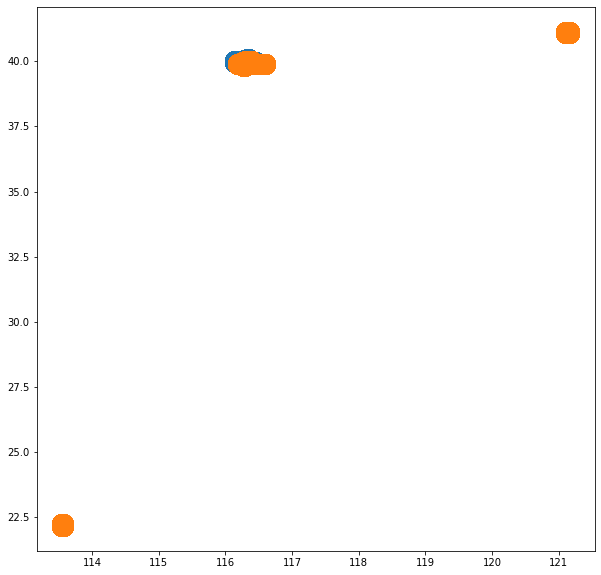

In [34]:
move_df.plot_trajs(return_fig=False)

#### c. And plot traj by TID feature

(     id        lat         lon            datetime          tid        date  \
 0     1  39.984093  116.319237 2008-10-23 05:53:05  12008102305  2008-10-23   
 1     1  39.984200  116.319321 2008-10-23 05:53:06  12008102305  2008-10-23   
 2     1  39.984222  116.319405 2008-10-23 05:53:11  12008102305  2008-10-23   
 3     1  39.984211  116.319389 2008-10-23 05:53:16  12008102305  2008-10-23   
 4     1  39.984219  116.319420 2008-10-23 05:53:21  12008102305  2008-10-23   
 ..   ..        ...         ...                 ...          ...         ...   
 109   1  39.979759  116.324516 2008-10-23 05:59:47  12008102305  2008-10-23   
 110   1  39.979744  116.324669 2008-10-23 05:59:50  12008102305  2008-10-23   
 111   1  39.979725  116.324791 2008-10-23 05:59:52  12008102305  2008-10-23   
 112   1  39.979691  116.324936 2008-10-23 05:59:54  12008102305  2008-10-23   
 113   1  39.979671  116.325035 2008-10-23 05:59:59  12008102305  2008-10-23   
 
      hour       day         period  d

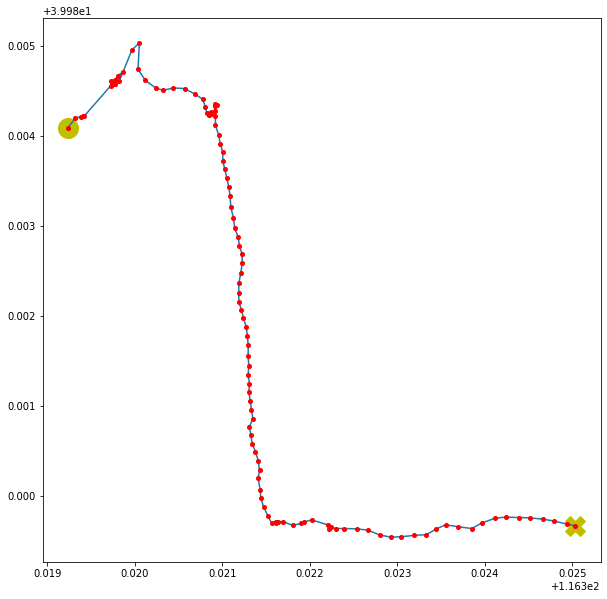

In [35]:
move_df.plot_traj_id("12008102305")

### And that's it! See upcoming notebooks to learn more about what PyMove can do!